In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data_file = '../results/fit.csv'
paramsGen, errorsGen, paramsR, errorsR, paramsL, errorsL, paramsC, errorsC = np.loadtxt(data_file, delimiter = ',', skiprows = 1,usecols=(0,1,2,3,4,5,6,7) ,unpack = True)

print("V_0 = ",paramsGen[0],"\n")
print("R_r = ",paramsR[0]," +/- ",errorsR[0])
print("R = ",paramsR[1]," +/- ",errorsR[1])
print("L = ",paramsR[2]," +/- ",errorsR[2])
print("C = ",paramsR[3]," +/- ",errorsR[3])
print("V_0 = ",paramsR[4]," +/- ",errorsR[4],"\n")
print("R = ",paramsL[0]," +/- ",errorsL[0])
print("L = ",paramsL[1]," +/- ",errorsL[1])
print("C = ",paramsL[2]," +/- ",errorsL[2])
print("V_0 = ",paramsL[3]," +/- ",errorsL[3],"\n")
print("R = ",paramsC[0]," +/- ",errorsC[0])
print("L = ",paramsC[1]," +/- ",errorsC[1])
print("C = ",paramsC[2]," +/- ",errorsC[2])
print("V_0 = ",paramsC[3]," +/- ",errorsC[3],"\n")

V_0 =  2.5 

R_r =  932.489  +/-  25.3998
R =  1898.94  +/-  39.4657
L =  0.0412736  +/-  0.00083767
C =  1.73677e-09  +/-  3.52946e-11
V_0 =  2.33894  +/-  0.0637094 

R =  1849.85  +/-  122.525
L =  0.039615  +/-  0.00262377
C =  1.79839e-09  +/-  1.19111e-10
V_0 =  2.4364  +/-  0.0016371 

R =  1912.21  +/-  163.315
L =  0.0407926  +/-  0.00348388
C =  1.77282e-09  +/-  1.51405e-10
V_0 =  2.42688  +/-  0.00168927 



In [7]:
def Gen_amp_model(f, V_0):
    return V_0
def R_amp_model(f, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def L_amp_model(f, R, L, C, V_0):
    num = 2*np.pi*f * L * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def C_amp_model(f, R, L, C, V_0):
    num = V_0 / (2*np.pi*f * C)
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den

f = np.linspace(5000,35000,1000)

ampGen = Gen_amp_model(f,paramsGen[0]) #not an array!
ampR = R_amp_model(f,paramsR[0],paramsR[1],paramsR[2],paramsR[3],paramsR[4])
ampL = L_amp_model(f,paramsL[0],paramsL[1],paramsL[2],paramsL[3])
ampC = C_amp_model(f,paramsC[0],paramsC[1],paramsC[2],paramsC[3])

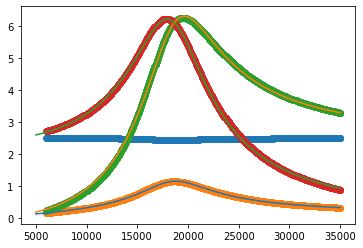

In [12]:
data_file = '../data/III session/Frequency response/amplitudes_fino35kHz.csv'
frequencies, amplitudeGen, amplitudeR, amplitudeL, amplitudeC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)
plt.plot(f,ampR)
plt.plot(f,ampL)
plt.plot(f,ampC)
plt.scatter(frequencies,amplitudeGen)
plt.scatter(frequencies,amplitudeR)
plt.scatter(frequencies,amplitudeL)
plt.scatter(frequencies,amplitudeC)

plt.savefig('../figs/fit_con_root.pdf')